In [3]:
#  Import libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



In [5]:
#  Upload and load data files
from google.colab import files

uploaded = files.upload()  # Upload train.csv, test.csv, features.csv, stores.csv

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

print("Train shape:", train.shape)
print("Features shape:", features.shape)
print("Stores shape:", stores.shape)


Saving features.csv to features (2).csv
Saving stores.csv to stores (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv
Train shape: (421570, 5)
Features shape: (8190, 12)
Stores shape: (45, 3)


In [6]:
#  Convert date and merge datasets
# Convert Date column
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

# Merge train + features + stores
df = train.merge(features, on=["Store","Date","IsHoliday"], how="left")
df = df.merge(stores, on="Store", how="left")

# Extract Year/Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3


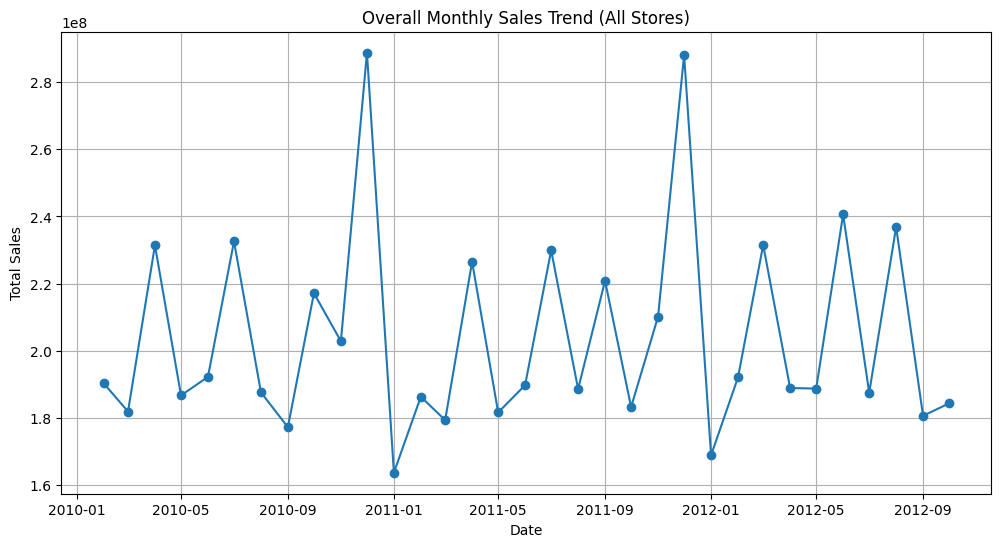

In [7]:
# Overall monthly sales trend
monthly_sales = df.groupby(['Year','Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales[['Year','Month']].assign(DAY=1))

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Weekly_Sales'], marker='o')
plt.title("Overall Monthly Sales Trend (All Stores)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


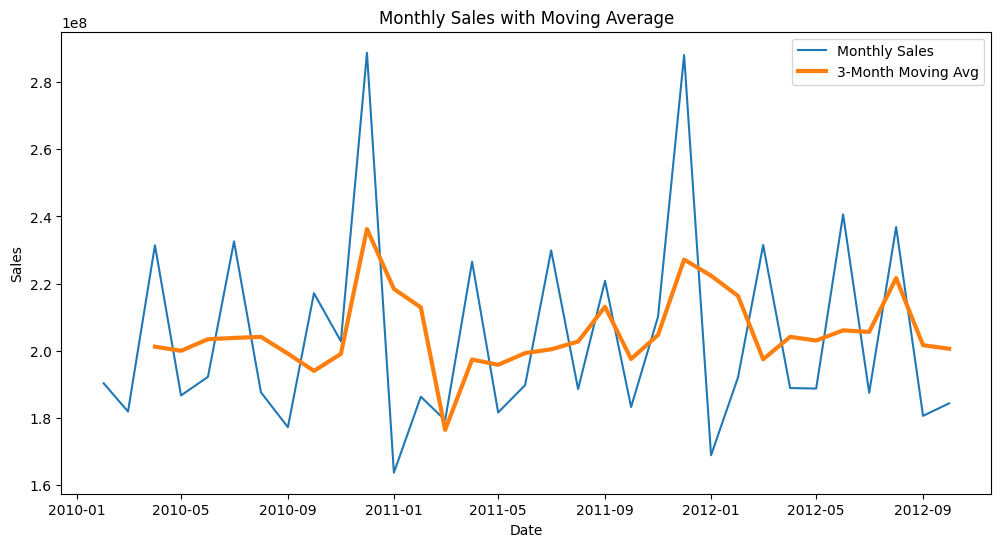

In [8]:
#  Moving average smoothing
monthly_sales['Moving_Avg'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Weekly_Sales'], label="Monthly Sales")
plt.plot(monthly_sales['YearMonth'], monthly_sales['Moving_Avg'], label="3-Month Moving Avg", linewidth=3)
plt.title("Monthly Sales with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


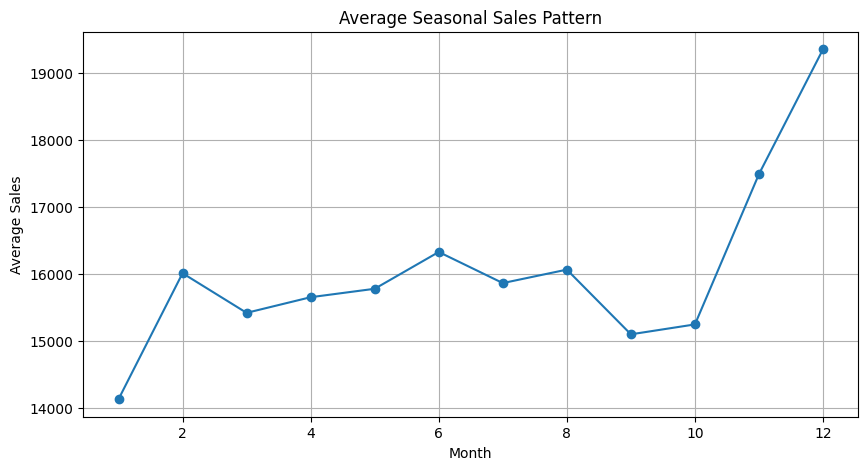

In [9]:
# Seasonal patterns (average monthly sales across years)
seasonal_pattern = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10,5))
plt.plot(seasonal_pattern.index, seasonal_pattern.values, marker='o')
plt.title("Average Seasonal Sales Pattern")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.grid(True)
plt.show()


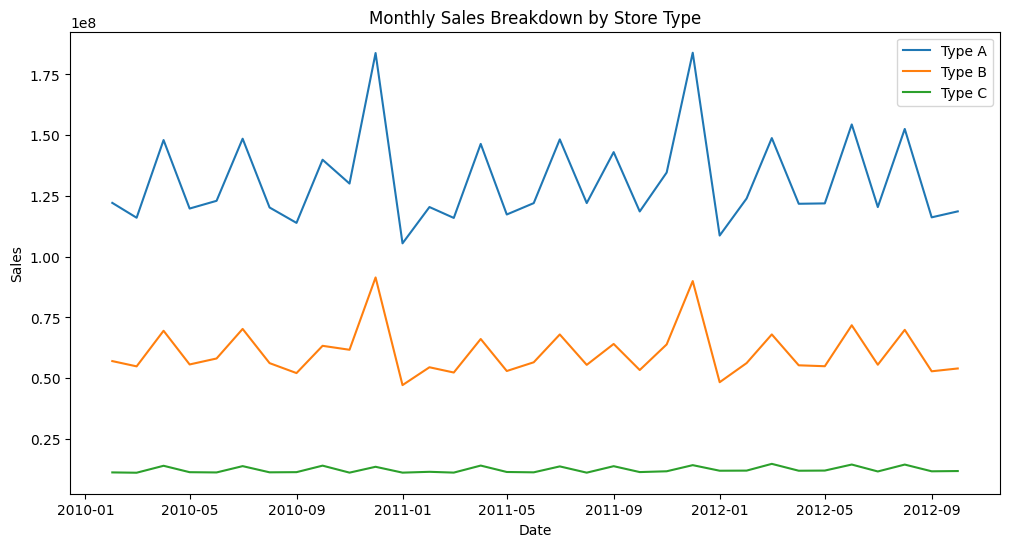

In [10]:
#  Breakdown by Store Type (Region)
store_type_sales = df.groupby(['Year','Month','Type'])['Weekly_Sales'].sum().reset_index()
store_type_sales['YearMonth'] = pd.to_datetime(store_type_sales[['Year','Month']].assign(DAY=1))

plt.figure(figsize=(12,6))
for t in store_type_sales['Type'].unique():
    subset = store_type_sales[store_type_sales['Type']==t]
    plt.plot(subset['YearMonth'], subset['Weekly_Sales'], label=f"Type {t}")

plt.title("Monthly Sales Breakdown by Store Type")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


/tmp/ipython-input-1342371470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_data['YearMonth'] = pd.to_datetime(dept_data[['Year','Month']].assign(DAY=1))
/tmp/ipython-input-1342371470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_data['YearMonth'] = pd.to_datetime(dept_data[['Year','Month']].assign(DAY=1))
/tmp/ipython-input-1342371470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

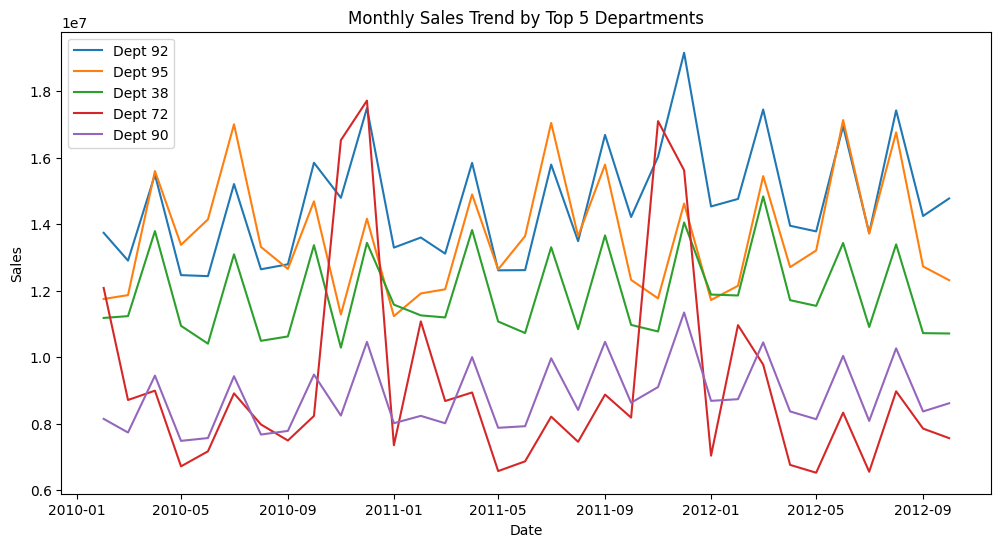

In [11]:
#  Breakdown by Top 5 Departments
dept_sales = df.groupby(['Dept','Year','Month'])['Weekly_Sales'].sum().reset_index()
top_depts = dept_sales.groupby('Dept')['Weekly_Sales'].sum().nlargest(5).index

plt.figure(figsize=(12,6))
for dept in top_depts:
    dept_data = dept_sales[dept_sales['Dept']==dept]
    dept_data['YearMonth'] = pd.to_datetime(dept_data[['Year','Month']].assign(DAY=1))
    plt.plot(dept_data['YearMonth'], dept_data['Weekly_Sales'], label=f"Dept {dept}")

plt.title("Monthly Sales Trend by Top 5 Departments")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

